In [1]:
feature_dict = {
    i:label for i, label in zip(
        range(4),
        ('sepal length in cm',
         'sepal width in cm',
         'petal length in cm',
         'petal width in cm',
        )
    )
}

In [3]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.io.parsers.read_csv(
    filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=','
)
df.columns = [l for i, l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True)

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# 将string串 进行转换
from sklearn.preprocessing import LabelEncoder
X = df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm',]].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [6]:
# 每类样例的均值
import numpy as np
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' % (cl, mean_vectors[cl-1]))

Mean Vector class 1: [ 5.006  3.418  1.464  0.244]

Mean Vector class 2: [ 5.936  2.77   4.26   1.326]

Mean Vector class 3: [ 6.588  2.974  5.552  2.026]



## 计算类内的散布矩阵和类间的散布矩阵

In [7]:
# 类内散布矩阵
S_W = np.zeros((4,4))
for cl, mv in zip(range(1,4),mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1)
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 38.9562  13.683   24.614    5.6556]
 [ 13.683   17.035    8.12     4.9132]
 [ 24.614    8.12    27.22     6.2536]
 [  5.6556   4.9132   6.2536   6.1756]]


In [8]:
# 类间散布矩阵
#
overall_mean = np.mean(X,axis=0)
S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    S_B += n * (mean_vec-overall_mean).dot((mean_vec-overall_mean).T)
print('between-class Scatter Matrix:\n',S_B)

between-class Scatter Matrix:
 [[  63.2121  -19.534   165.1647   71.3631]
 [ -19.534    10.9776  -56.0552  -22.4924]
 [ 165.1647  -56.0552  436.6437  186.9081]
 [  71.3631  -22.4924  186.9081   80.6041]]


## 求解矩阵的特征值


In [9]:
# w 是 矩阵的特征向量
eig_vals,eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)
    print('\nEigenvector {}: \n{}'.format(i+1,eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1,eig_vals[i].real))


Eigenvector 1: 
[[-0.2049]
 [-0.3871]
 [ 0.5465]
 [ 0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[ 0.009 ]
 [ 0.589 ]
 [-0.2543]
 [ 0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[ 0.138 ]
 [-0.326 ]
 [-0.3796]
 [ 0.6671]]
Eigenvalue 3: -2.17e-16

Eigenvector 4: 
[[ 0.138 ]
 [-0.326 ]
 [-0.3796]
 [ 0.6671]]
Eigenvalue 4: -2.17e-16


## 特征值与特征向量
* 特征向量：表示映射方向
* 特征值：特征向量的重要程度

In [10]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs = sorted(eig_pairs, key=lambda k:k[0],reverse=True)

print('Eigenvalues in decreasing order:\n')

for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.2719577997
0.27756686384
4.05933275259e-15
4.05933275259e-15


In [12]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eignvalue {0:}: {1:.2%}'.format(i+1,(j[0]/eigv_sum).real))

Variance explained:

eignvalue 1: 99.15%
eignvalue 2: 0.85%
eignvalue 3: 0.00%
eignvalue 4: 0.00%


选择前两维特征

In [13]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[-0.2049  0.009 ]
 [-0.3871  0.589 ]
 [ 0.5465 -0.2543]
 [ 0.7138  0.767 ]]


In [14]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2)," The matrix is not 150*2 dimensional"

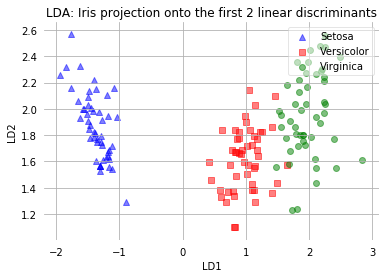

In [25]:
label_dict = {1:'Setosa', 2:'Versicolor', 3:'Virginica'}
from matplotlib import pyplot as plt
%matplotlib inline 

def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(
        range(1,4),('^','s','o'),('blue','red','green')
    ):
        plt.scatter(x=X_lda[:,0].real[y == label],
                    y=X_lda[:,1].real[y == label],
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label]
                   )
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')
    
    plt.tick_params(axis='both',which='both',bottom='off',top='off',
                    labelbottom='on', left='off',right='off',labelleft='on')
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    plt.grid()
    plt.tight_layout
    plt.show()
plot_step_lda()

In [16]:
label_encoder

LabelEncoder()

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X,y)

In [33]:
label_dict = {1:'Setosa', 2:'Versicolor', 3:'Virginica'}


def plot_scikit_lda(X,title):
    ax = plt.subplot(111)
    for label, marker, color in zip(
        range(1,4),('^','s','o'),('blue','red','green')
    ):
        plt.scatter(x=X[:,0].real[y == label],
                    y=X[:,1].real[y == label],
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label]
                   )
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    
    plt.tick_params(axis='both',which='both',bottom='off',top='off',
                    labelbottom='on', left='off',right='off',labelleft='on')
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    plt.grid()
    plt.tight_layout
    plt.show()


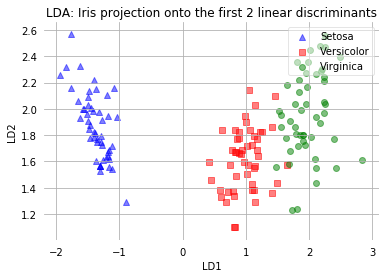

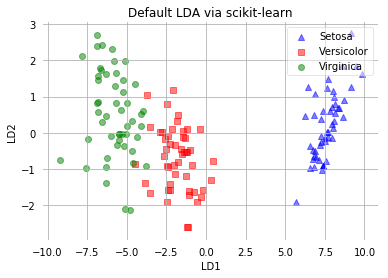

In [34]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn,title='Default LDA via scikit-learn')